In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
data_path=r"C:\Users\E284652\Documents\PVSEC\energy_comparison_panel, 5x5-module, mono-module).csv"

In [19]:
df=pd.read_csv(data_path)
df=df.dropna()
df.head()

,time,5x5_1,mono_2,panel,mono_1,5x5_2
1,3:02:00 PM,29.436345,28.86750,28.647648,28.653075,28.173159
2,3:04:00 PM,29.402289,28.75950,28.533207,28.573875,27.953928
3,3:06:00 PM,29.338128,28.71855,28.496493,28.568250,27.872757
4,3:08:00 PM,29.296728,28.69965,28.450985,28.480050,27.756918
7,3:14:00 PM,28.408923,27.87885,27.591753,27.726525,27.115974


In [20]:
df['time']=pd.to_datetime(df['time'],format="%H:%M:%S %p")

In [21]:
df.columns

Index(['time', '5x5_1', 'mono_2', 'panel', 'mono_1', '5x5_2'], dtype='object')

In [27]:
df['5x5_mono_1']=df['5x5_1']/df['mono_1']
df['5x5_mono_2']=df['5x5_1']/df['mono_2']
df['panel_mono_1']=df['panel']/df['mono_1']
df['panel_mono_2']=df['panel']/df['mono_2']
df['5x5_2_mono_1']=df['5x5_2']/df['mono_1']
df['5x5_2_mono_2']=df['5x5_2']/df['mono_2']

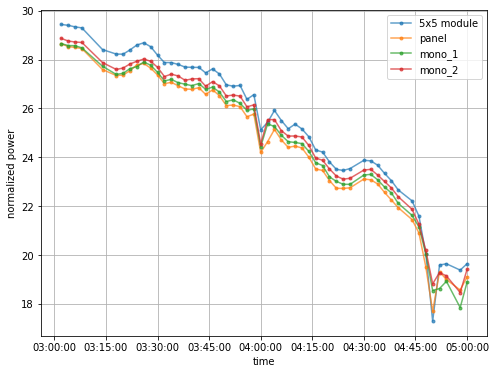

In [28]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%H:%M:%S')

fig,ax=plt.subplots(1,figsize=(8,6))
ax.plot(df['time'],df['5x5_1'],'.-',alpha=0.7,label='5x5 module')
ax.plot(df['time'],df['panel'],'.-',alpha=0.7,label='panel')
ax.plot(df['time'],df['mono_1'],'.-',alpha=0.7,label='mono_1')
ax.plot(df['time'],df['mono_2'],'.-',alpha=0.7,label='mono_2')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel("normalized power")
ax.set_xlabel("time")
ax.legend()
ax.grid()
plt.savefig("normalized_power_vs_time.png",dpi=300)
plt.show()

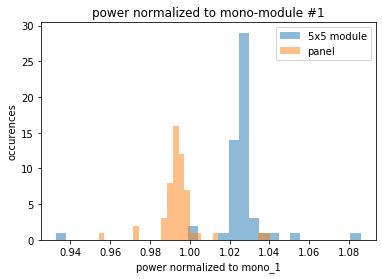

In [29]:
plt.hist(df['5x5_mono_1'],alpha=0.5,bins=30,label="5x5 module")
plt.hist(df['panel_mono_1'],alpha=0.5,bins=30,label="panel")
plt.legend()
plt.xlabel("power normalized to mono_1")
plt.ylabel("occurences")
plt.title("power normalized to mono-module #1")
plt.savefig("normalized_module_power_mono_1.png",dpi=300)
plt.show()

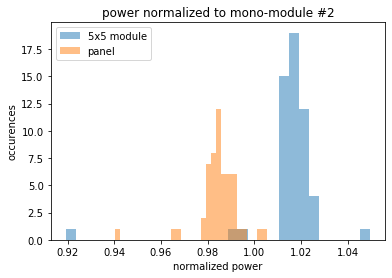

In [30]:
plt.hist(df['5x5_mono_2'],alpha=0.5,bins=30,label="5x5 module")
plt.hist(df['panel_mono_2'],alpha=0.5,bins=30,label="panel")
plt.legend()
plt.xlabel("normalized power")
plt.ylabel("occurences")
plt.title("power normalized to mono-module #2")
plt.savefig("normalized_module_power_mono_2.png",dpi=300)
plt.show()

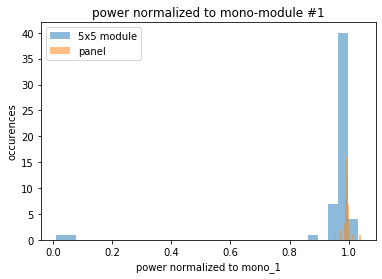

In [31]:
plt.hist(df['5x5_2_mono_1'],alpha=0.5,bins=30,label="5x5 module")
plt.hist(df['panel_mono_1'],alpha=0.5,bins=30,label="panel")
plt.legend()
plt.xlabel("power normalized to mono_1")
plt.ylabel("occurences")
plt.title("power normalized to mono-module #1")
plt.savefig("normalized_module_power_mono_1.png",dpi=300)
plt.show()

In [37]:
filtered_mono=df.loc[df['5x5_2_mono_1']>0.8,'5x5_2_mono_1']
print(filtered_mono.median())

0.9780773412258824


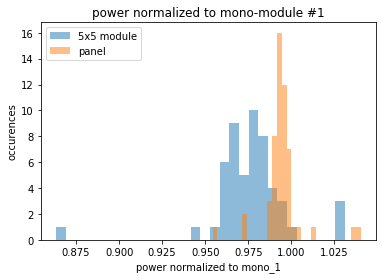

In [36]:
plt.hist(filtered_mono,alpha=0.5,bins=30,label="5x5 module")
plt.hist(df['panel_mono_1'],alpha=0.5,bins=30,label="panel")
plt.legend()
plt.xlabel("power normalized to mono_1")
plt.ylabel("occurences")
plt.title("power normalized to mono-module #1")
plt.savefig("normalized_module_power_mono_1.png",dpi=300)
plt.show()